<a href="https://colab.research.google.com/github/justme088/lab-termodinamica/blob/main/Lab3Termodinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 3 de Termodinámica - CALOR LATENTE, SENSIBLE Y CAMBIO DE FASE**

## **Profesora: Mayubell Alvarado-Valdes**

Grupo: Jostin Vargas, Alejandro Philips, Roxana Figueroa, Aidan García, Dionisio Conde, Keysi Bonilla

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.ndimage import uniform_filter1d
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import stats

# **Medición de la temperatura del hielo**

In [62]:
f1 = '/content/drive/MyDrive/GoogleColab/Termo/Lab3/Datos/Rep1/tempInicialHielo.csv'
f2 = '/content/drive/MyDrive/GoogleColab/Termo/Lab3/Datos/Rep2/tempInicialHieloB1.csv'
f3 = '/content/drive/MyDrive/GoogleColab/Termo/Lab3/Datos/Rep3/tempInicialHieloC1.csv'

d1 = pd.read_csv(f1)
d2 = pd.read_csv(f2)
d3 = pd.read_csv(f3)

In [63]:
def recortar_dataframe(df1, df2):
    # Determinar la longitud mínima entre df1 y df2
    longitud_minima = min(len(df1), len(df2))

    # Recortar df1 para que tenga la misma longitud que df2
    df1_recortado = df1.head(longitud_minima)

    return df1_recortado

def dataframe_mas_corto(array_dataframes):
    longitud_mas_corta = float('inf')  # Inicializar con un valor grande
    dataframe_mas_corto = None

    # Iterar sobre cada DataFrame en el array
    for df in array_dataframes:
        longitud_actual = len(df)
        if longitud_actual < longitud_mas_corta:
            longitud_mas_corta = longitud_actual
            dataframe_mas_corto = df

    return dataframe_mas_corto

def interpolacion_polinomica(x,y,n=3):
  coeffs = np.polyfit(x, y, n)
  poly = np.poly1d(coeffs)
  x_new = np.linspace(x.min(), x.max(), 100)
  return [x_new, poly(x_new)]

def calcular_R2(y_observado, y_ajustado):
    ss_res = np.sum((y_observado - y_ajustado) ** 2)
    ss_tot = np.sum((y_observado - np.mean(y_observado)) ** 2)
    return 1 - (ss_res / ss_tot)

## **Graficación de los datos medidos de la temperatura del hielo**

Diferencias promedios de la temperatura medida del hielo (Termocupla mini y normal):

· repetición 2 [termocupla mini] con repetición 3 [termocupla normal]: 0.36 ºC
· repetición 2 [termocupla mini] con repetición 1 [termocupla mini]: 6.55 ºC
· repetición 2 [termocupla mini] con repetición 3 [termocupla mini]: 13.24 ºC

· repetición 3 [termocupla normal] con repetición 1 [termocupla mini]: 6.19 ºC
· repetición 3 [termocupla normal] con repetición 3 [termocupla mini]: 12.88 ºC

· repetición 1 [termocupla mini] con repetición 3 [termocupla mini]: 6.69 ºC



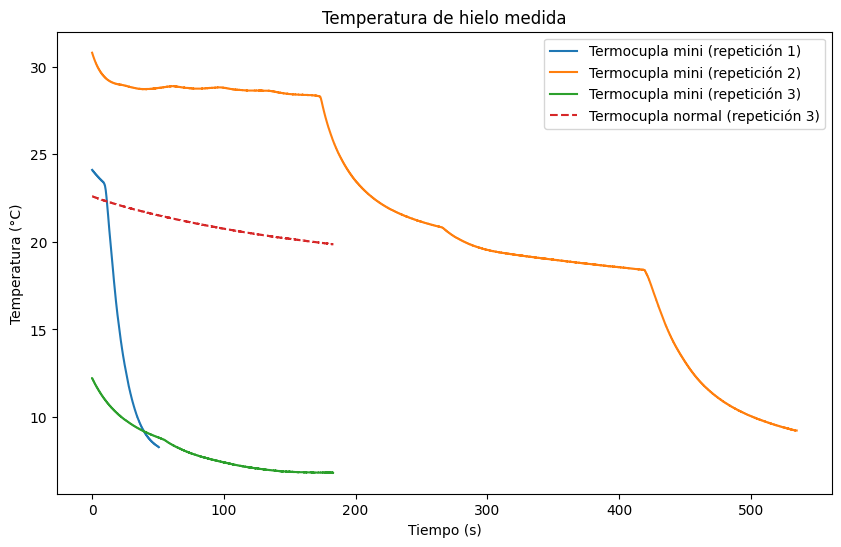

In [64]:
# Se configura la graficación de los datos para una mejor visualización de los mismos.
plt.figure(figsize=(10, 6))
plt.plot(d1['Tiempo'], d1['Temperatura_1'], label='Termocupla mini (repetición 1)')

plt.plot(d2['Tiempo'], d2['Temperatura_1'], label='Termocupla mini (repetición 2)',)

plt.plot(d3['Tiempo'], d3['Temperatura_1'], label='Termocupla mini (repetición 3)')
plt.plot(d3['Tiempo'], d3['Temperatura_4'], label='Termocupla normal (repetición 3)', linestyle='dashed')

plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura de hielo medida')
plt.legend()

print("Diferencias promedios de la temperatura medida del hielo (Termocupla mini y normal):\n")

dif_d2t1_d3t4 = round(abs(np.mean([d2['Temperatura_1']]) - np.mean([d3['Temperatura_4']])),2)
print('· repetición 2 [termocupla mini] con repetición 3 [termocupla normal]: '+str(dif_d2t1_d3t4)+' ºC')

dif_d2t1_d1t1 = round(abs(np.mean([d2['Temperatura_1']]) - np.mean([d1['Temperatura_1']])),2)
print('· repetición 2 [termocupla mini] con repetición 1 [termocupla mini]: '+str(dif_d2t1_d1t1)+' ºC')

dif_d2t1_d3t1 = round(abs(np.mean([d2['Temperatura_1']]) - np.mean([d3['Temperatura_1']])),2)
print('· repetición 2 [termocupla mini] con repetición 3 [termocupla mini]: '+str(dif_d2t1_d3t1)+' ºC')
print()
dif_d3t4_d1t1 = round(abs(np.mean([d3['Temperatura_4']]) - np.mean([d1['Temperatura_1']])),2)
print('· repetición 3 [termocupla normal] con repetición 1 [termocupla mini]: '+str(dif_d3t4_d1t1)+' ºC')

dif_d3t4_d3t1 = round(abs(np.mean([d3['Temperatura_4']]) - np.mean([d3['Temperatura_1']])),2)
print('· repetición 3 [termocupla normal] con repetición 3 [termocupla mini]: '+str(dif_d3t4_d3t1)+' ºC')
print()
dif_d1t1_d3t1 = round(abs(np.mean([d1['Temperatura_1']]) - np.mean([d3['Temperatura_1']])),2)
print('· repetición 1 [termocupla mini] con repetición 3 [termocupla mini]: '+str(dif_d1t1_d3t1)+' ºC')
print()

plt.show()


## **Comparación de datos medidos por la termocupla mini entre las repeticiones hechas**

Análisis de varianza (ANOVA) de la temperatura medida del hielo (termocupla mini)

Estadístico F: 7792.038925150683
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.



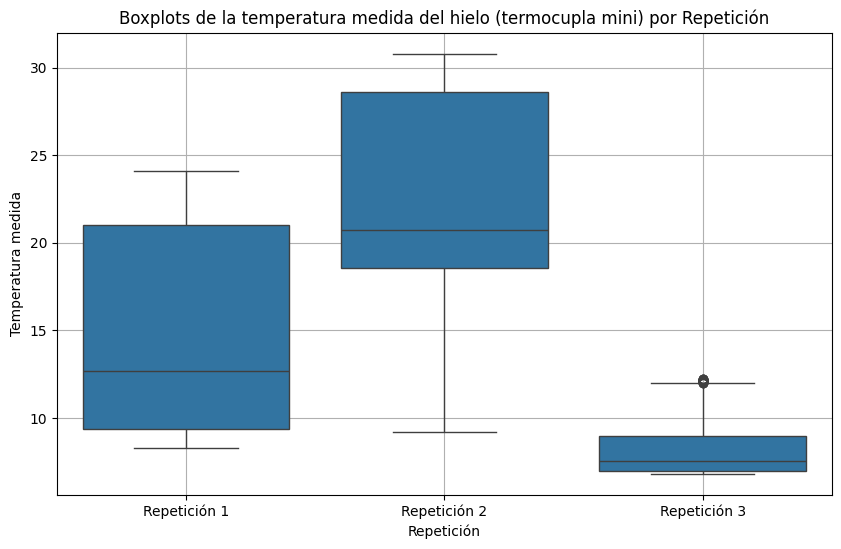

In [65]:

# Para realizar una interpretación estadística no solo a través de diferencias de promedios, se puede aplicar ANOVA.
# Este se debe a que el ANOVA (Análisis de Varianza) es una técnica estadística utilizada para comparar las medias de tres
# o más grupos y determinar si existen diferencias significativas entre ellos.

# Una forma de visualizar también eso junto a la varianza de los datos, es a travésde los boxplots por cómo representan las distribución de los datos
# a través de cuartiles, denotando también la media y denotando los valores que son atípicos.

df = pd.DataFrame({
    'Grupo': ['Repetición 1'] * len(d1['Temperatura_1']) + ['Repetición 2'] * len(d2['Temperatura_1']) + ['Repetición 3'] * len(d3['Temperatura_1']),
    'Termocupla_mini': pd.concat([d1['Temperatura_1'], d2['Temperatura_1'], d3['Temperatura_1']])
})

# Graficar boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Termocupla_mini', data=df)
plt.title('Boxplots de la temperatura medida del hielo (termocupla mini) por Repetición')
plt.xlabel('Repetición')
plt.ylabel('Temperatura medida')
plt.grid(True)

# Aplicar ANOVA
statistic, p_value = f_oneway(d1['Temperatura_1'], d2['Temperatura_1'], d3['Temperatura_1'])

# Mostrar resultados
print('Análisis de varianza (ANOVA) de la temperatura medida del hielo (termocupla mini)\n')
print(f'Estadístico F: {statistic}')
print(f'Valor p: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print('Hay diferencias significativas entre al menos dos grupos.')
else:
    print('No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.')
print()
plt.show()

## **Graficación de la temperatura del hielo promedio entre repeticiones hecha por la termocupla mini y lo medido por la termocupla normal**

Diferencias promedios de la temperatura medida del hielo (Termocupla mini y normal):

· Termocupla mini [temperatura promedio] con Termocupla normal: 8.48 ºC 



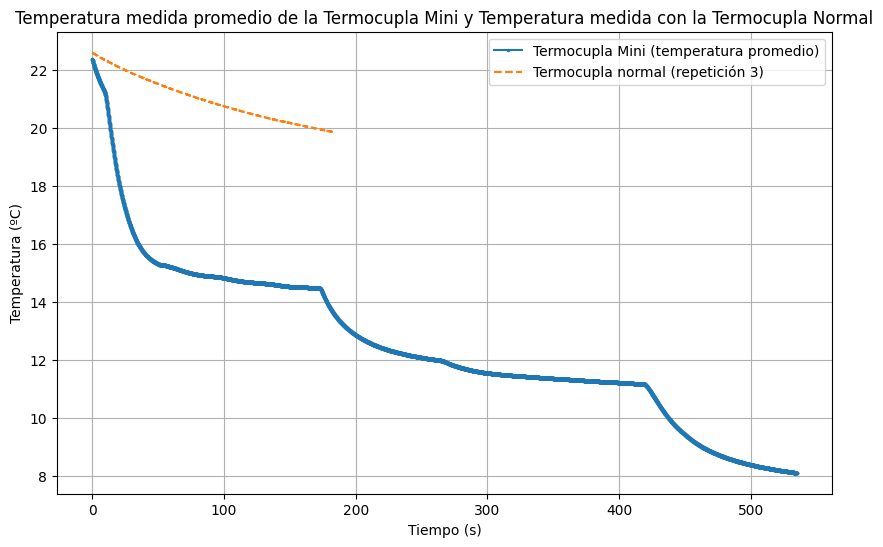

In [66]:
# Combinación de datos del calorímetro del laboratorio

# Crear una referencia de tiempo común usando la intersección de los rangos de tiempo de cada DataFrame
tiempo_comun = pd.Series(sorted(set(d1['Tiempo']).union(set(d2['Tiempo'])).union(set(d3['Tiempo']))))

# Interpolación para alinear los datos
d1_interp = d1.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()
d2_interp = d2.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()
d3_interp = d3.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()

# Crear un DataFrame para las mediciones promedio
df_combinadot1 = pd.DataFrame()

# Asignar la columna 'Tiempo'
df_combinadot1['Tiempo'] = tiempo_comun

# Calcular el promedio de las columnas de temperatura
df_combinadot1['Temperatura_1_Promedio'] = (d1_interp['Temperatura_1'] + d2_interp['Temperatura_1'] + d3_interp['Temperatura_1']) / 3

plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Graficar la temperatura promedio
plt.plot(df_combinadot1['Tiempo'], df_combinadot1['Temperatura_1_Promedio'], label='Termocupla Mini (temperatura promedio)', marker='o', linestyle='-', markersize=1.5)
plt.plot(d3['Tiempo'], d3['Temperatura_4'], label='Termocupla normal (repetición 3)', linestyle='dashed')

# Configurar etiquetas y título
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (ºC)')
plt.title('Temperatura medida promedio de la Termocupla Mini y Temperatura medida con la Termocupla Normal')
plt.legend()  # Mostrar leyenda

# Mostrar la gráfica
plt.grid(True)  # Mostrar cuadrícula

print("Diferencias promedios de la temperatura medida del hielo (Termocupla mini y normal):\n")

dif_d1d2d3t1_d3t4 = round(abs(np.mean([df_combinadot1['Temperatura_1_Promedio']]) - np.mean([d3['Temperatura_4']])),2)
print('· Termocupla mini [temperatura promedio] con Termocupla normal: '+str(dif_d1d2d3t1_d3t4)+' ºC \n')

plt.show()


## **Comparación de variaciones entre el promedio de la termocupla mini y lo medido por la termocupla normal, de la temperatura del hielo**

Análisis de varianza (ANOVA) de la temperatura medida del hielo por la termocupla mini (promedio) y por la termocupla normal 

Estadístico F: 32875.90389793942
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.



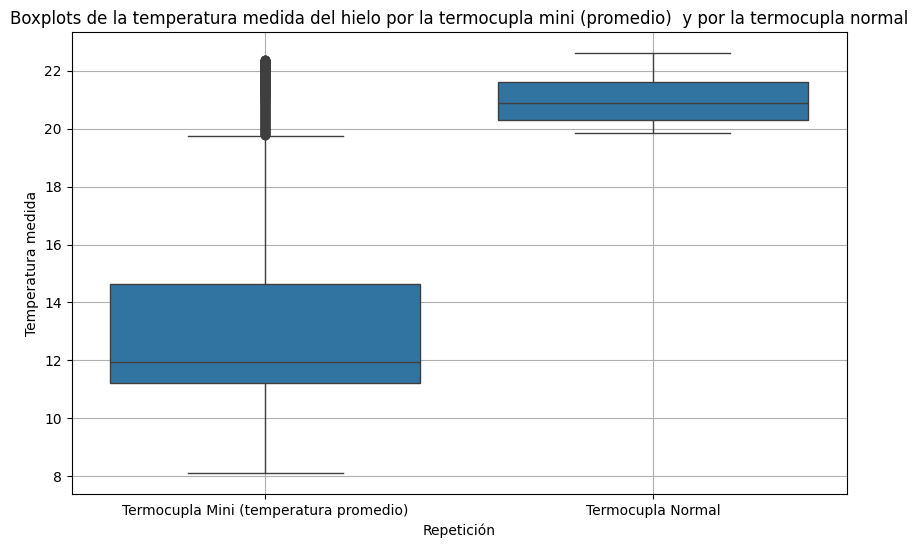

In [67]:

# Para realizar una interpretación estadística no solo a través de diferencias de promedios, se puede aplicar ANOVA.
# Este se debe a que el ANOVA (Análisis de Varianza) es una técnica estadística utilizada para comparar las medias de tres
# o más grupos y determinar si existen diferencias significativas entre ellos.

# Una forma de visualizar también eso junto a la varianza de los datos, es a travésde los boxplots por cómo representan las distribución de los datos
# a través de cuartiles, denotando también la media y denotando los valores que son atípicos.

df = pd.DataFrame({
    'Grupo': ['Termocupla Mini (temperatura promedio)'] * len(df_combinadot1['Temperatura_1_Promedio']) + ['Termocupla Normal'] * len(d3['Temperatura_4']),
    'Temperaturas': pd.concat([df_combinadot1['Temperatura_1_Promedio'], d3['Temperatura_4']])
})

# Graficar boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Temperaturas', data=df)
plt.title('Boxplots de la temperatura medida del hielo por la termocupla mini (promedio)  y por la termocupla normal')
plt.xlabel('Repetición')
plt.ylabel('Temperatura medida')
plt.grid(True)

# Aplicar ANOVA
statistic, p_value = f_oneway(df_combinadot1['Temperatura_1_Promedio'], d3['Temperatura_4'])

# Mostrar resultados
print('Análisis de varianza (ANOVA) de la temperatura medida del hielo por la termocupla mini (promedio) y por la termocupla normal \n')
print(f'Estadístico F: {statistic}')
print(f'Valor p: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print('Hay diferencias significativas entre al menos dos grupos.')
else:
    print('No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.')
print()
plt.show()

## **Medición de temperatura del agua calentada dentro del calorímetro**

In [68]:
f4 = '/content/drive/MyDrive/GoogleColab/Termo/Lab3/Datos/Rep1/tempCalorimetroHielo.csv'
f5 = '/content/drive/MyDrive/GoogleColab/Termo/Lab3/Datos/Rep2/tempCalorimetroHieloB.csv'
f6 = '/content/drive/MyDrive/GoogleColab/Termo/Lab3/Datos/Rep3/tempCalorimetroHieloC_SOLOTEMP4.csv'

d4 = pd.read_csv(f4)
d5 = pd.read_csv(f5)
d6 = pd.read_csv(f6)

## Graficación de los datos de temperatura medida del agua calentada dentro del calorímetro por las termocuplas, sin ajustar

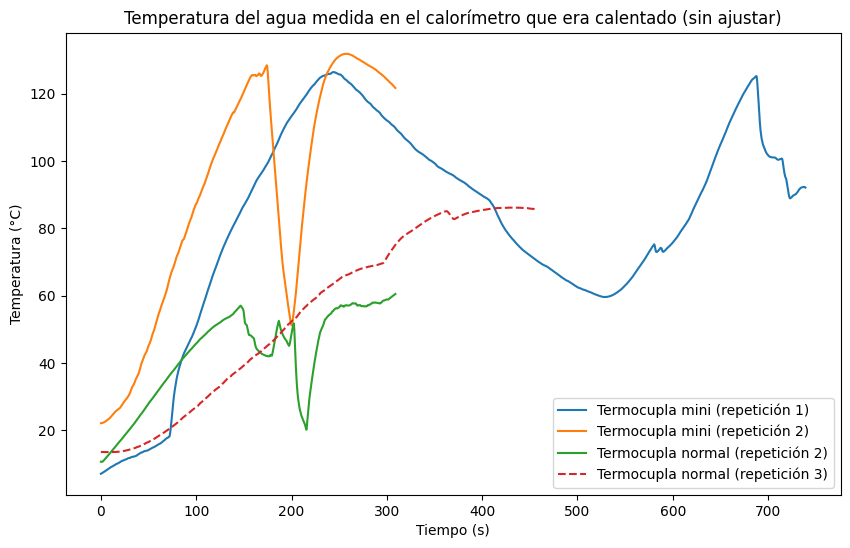

In [69]:
# Se configura la graficación de los datos para una mejor visualización de los mismos.
plt.figure(figsize=(10, 6))
plt.plot(d4['Tiempo'], d4['Temperatura_1'], label='Termocupla mini (repetición 1)')

plt.plot(d5['Tiempo'], d5['Temperatura_1'], label='Termocupla mini (repetición 2)',)
plt.plot(d5['Tiempo'], d5['Temperatura_4'], label='Termocupla normal (repetición 2)')

plt.plot(d6['Tiempo'], d6['Temperatura_4'], label='Termocupla normal (repetición 3)', linestyle='dashed')

plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura del agua medida en el calorímetro que era calentado (sin ajustar)')
plt.legend()

plt.show()


In [70]:
f4 = '/content/drive/MyDrive/GoogleColab/Termo/Lab3/Datos/Rep1/tempCalorimetroHielo_Act.csv'
f5 = '/content/drive/MyDrive/GoogleColab/Termo/Lab3/Datos/Rep2/tempCalorimetroHieloB_Act.csv'
f5_5 = '/content/drive/MyDrive/GoogleColab/Termo/Lab3/Datos/Rep2/tempCalorimetroHieloB_Act_T4.csv'
f6 = '/content/drive/MyDrive/GoogleColab/Termo/Lab3/Datos/Rep3/tempCalorimetroHieloC_SOLOTEMP4_Act.csv'

d4 = pd.read_csv(f4)
d5 = pd.read_csv(f5)
d5_5 = pd.read_csv(f5_5)
d6 = pd.read_csv(f6)

## **Graficación de los datos de temperatura medida del agua calentada dentro del calorímetro por las termocuplas, ajustado**

Diferencias promedios de la temperatura medida del agua (Termocupla mini y normal):

· repetición 2 [termocupla mini] con repetición 2 [termocupla normal]: 39.93 ºC
· repetición 2 [termocupla mini] con repetición 1 [termocupla mini]: 10.32 ºC
· repetición 2 [termocupla mini] con repetición 3 [termocupla normal]: 24.65 ºC

· repetición 2 [termocupla normal] con repetición 1 [termocupla mini]: 29.61 ºC
· repetición 2 [termocupla normal] con repetición 3 [termocupla normal]: 15.28 ºC

· repetición 1 [termocupla mini] con repetición 3 [termocupla normal]: 14.33 ºC



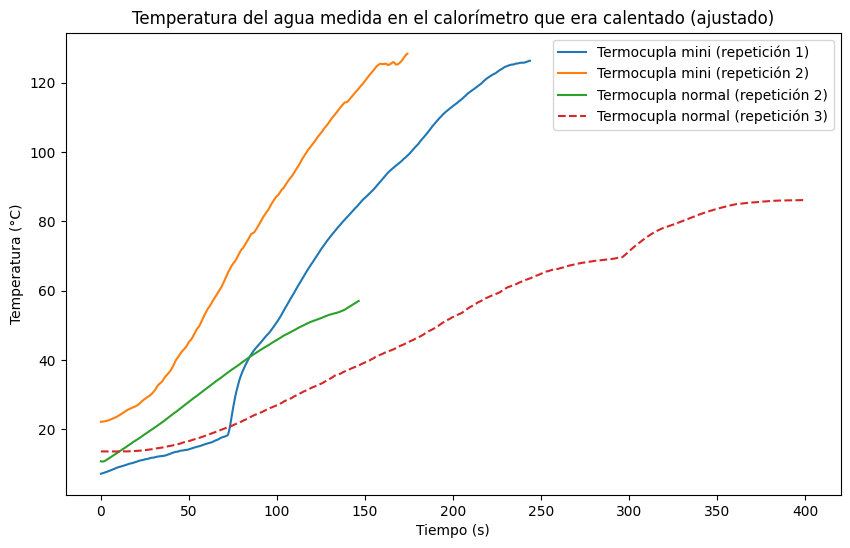

In [71]:
# Se configura la graficación de los datos para una mejor visualización de los mismos.

plt.figure(figsize=(10, 6))
plt.plot(d4['Tiempo'], d4['Temperatura_1'], label='Termocupla mini (repetición 1)')

plt.plot(d5['Tiempo'], d5['Temperatura_1'], label='Termocupla mini (repetición 2)',)
plt.plot(d5_5['Tiempo'], d5_5['Temperatura_4'], label='Termocupla normal (repetición 2)')

plt.plot(d6['Tiempo'], d6['Temperatura_4'], label='Termocupla normal (repetición 3)', linestyle='dashed')

plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura del agua medida en el calorímetro que era calentado (ajustado)')
plt.legend()

print("Diferencias promedios de la temperatura medida del agua (Termocupla mini y normal):\n")

dif_d5t1_d55t4 = round(abs(np.mean([d5['Temperatura_1']]) - np.mean([d5_5['Temperatura_4']])),2)
print('· repetición 2 [termocupla mini] con repetición 2 [termocupla normal]: '+str(dif_d5t1_d55t4)+' ºC')

dif_d5t1_d4t1 = round(abs(np.mean([d5['Temperatura_1']]) - np.mean([d4['Temperatura_1']])),2)
print('· repetición 2 [termocupla mini] con repetición 1 [termocupla mini]: '+str(dif_d5t1_d4t1)+' ºC')

dif_d5t1_d6t4 = round(abs(np.mean([d5['Temperatura_1']]) - np.mean([d6['Temperatura_4']])),2)
print('· repetición 2 [termocupla mini] con repetición 3 [termocupla normal]: '+str(dif_d5t1_d6t4)+' ºC')
print()
dif_d55t4_d4t1 = round(abs(np.mean([d5_5['Temperatura_4']]) - np.mean([d4['Temperatura_1']])),2)
print('· repetición 2 [termocupla normal] con repetición 1 [termocupla mini]: '+str(dif_d55t4_d4t1)+' ºC')

dif_d55t4_d6t1 = round(abs(np.mean([d5_5['Temperatura_4']]) - np.mean([d6['Temperatura_4']])),2)
print('· repetición 2 [termocupla normal] con repetición 3 [termocupla normal]: '+str(dif_d55t4_d6t1)+' ºC')
print()
dif_d4t1_d6t4 = round(abs(np.mean([d4['Temperatura_1']]) - np.mean([d6['Temperatura_4']])),2)
print('· repetición 1 [termocupla mini] con repetición 3 [termocupla normal]: '+str(dif_d4t1_d6t4)+' ºC')
print()

plt.show()


## **Boxplots graficar la variación de la temperatura medida del agua calentada en el calorímetro por la termocupla mini**

Análisis de varianza (ANOVA) de la temperatura medida del hielo (termocupla mini)

Estadístico F: 138.76628504634863
Valor p: 8.830381857819976e-32
Hay diferencias significativas entre al menos dos grupos.



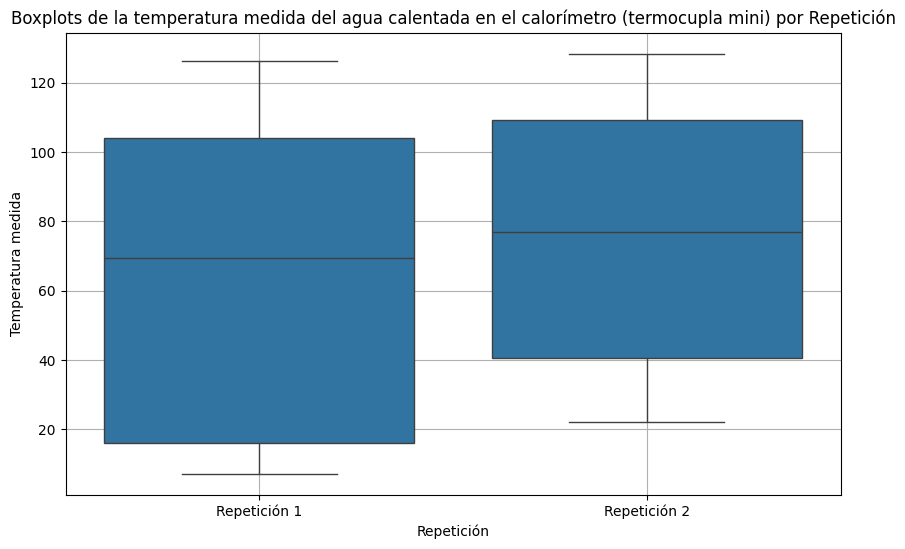

In [72]:

# Para realizar una interpretación estadística no solo a través de diferencias de promedios, se puede aplicar ANOVA.
# Este se debe a que el ANOVA (Análisis de Varianza) es una técnica estadística utilizada para comparar las medias de tres
# o más grupos y determinar si existen diferencias significativas entre ellos.

# Una forma de visualizar también eso junto a la varianza de los datos, es a travésde los boxplots por cómo representan las distribución de los datos
# a través de cuartiles, denotando también la media y denotando los valores que son atípicos.

df = pd.DataFrame({
    'Grupo': ['Repetición 1'] * len(d4['Temperatura_1']) + ['Repetición 2'] * len(d5['Temperatura_1']),
    'Termocupla_mini': pd.concat([d4['Temperatura_1'], d5['Temperatura_1']])
})

# Graficar boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Termocupla_mini', data=df)
plt.title('Boxplots de la temperatura medida del agua calentada en el calorímetro (termocupla mini) por Repetición')
plt.xlabel('Repetición')
plt.ylabel('Temperatura medida')
plt.grid(True)

# Aplicar ANOVA
statistic, p_value = f_oneway(d4['Temperatura_1'], d5['Temperatura_1'])

# Mostrar resultados
print('Análisis de varianza (ANOVA) de la temperatura medida del hielo (termocupla mini)\n')
print(f'Estadístico F: {statistic}')
print(f'Valor p: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print('Hay diferencias significativas entre al menos dos grupos.')
else:
    print('No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.')
print()
plt.show()

## **Boxplots para graficar la variación de la temperatura medida del agua calentada en el calorímetro por la termocupla normal**

Análisis de varianza (ANOVA) de la temperatura medida del hielo (termocupla normal)

Estadístico F: 991.716507808698
Valor p: 1.934934700467708e-208
Hay diferencias significativas entre al menos dos grupos.



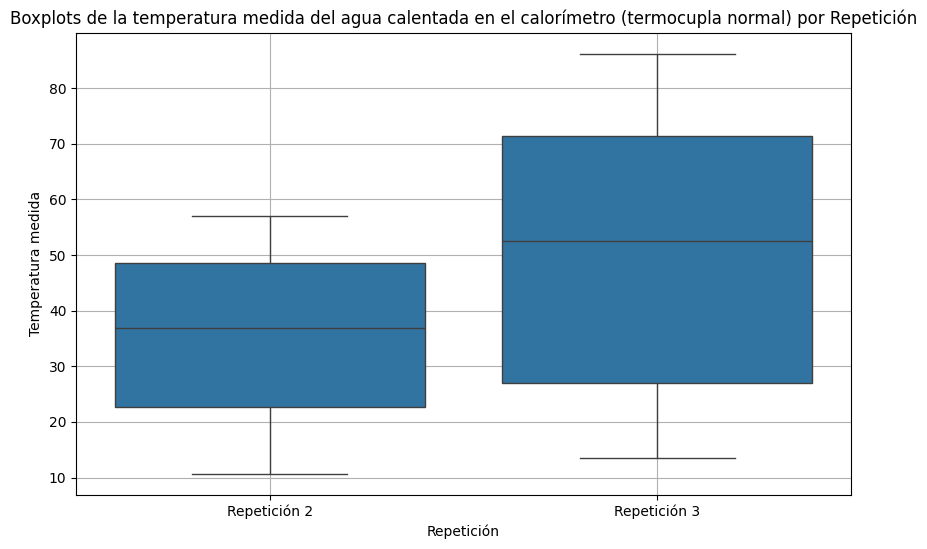

In [73]:

# Para realizar una interpretación estadística no solo a través de diferencias de promedios, se puede aplicar ANOVA.
# Este se debe a que el ANOVA (Análisis de Varianza) es una técnica estadística utilizada para comparar las medias de tres
# o más grupos y determinar si existen diferencias significativas entre ellos.

# Una forma de visualizar también eso junto a la varianza de los datos, es a travésde los boxplots por cómo representan las distribución de los datos
# a través de cuartiles, denotando también la media y denotando los valores que son atípicos.

df = pd.DataFrame({
    'Grupo': ['Repetición 2'] * len(d5_5['Temperatura_4']) + ['Repetición 3'] * len(d6['Temperatura_4']),
    'Termocupla_normal': pd.concat([d5_5['Temperatura_4'], d6['Temperatura_4']])
})

# Graficar boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Termocupla_normal', data=df)
plt.title('Boxplots de la temperatura medida del agua calentada en el calorímetro (termocupla normal) por Repetición')
plt.xlabel('Repetición')
plt.ylabel('Temperatura medida')
plt.grid(True)

# Aplicar ANOVA
statistic, p_value = f_oneway(d5_5['Temperatura_4'], d6['Temperatura_4'])

# Mostrar resultados
print('Análisis de varianza (ANOVA) de la temperatura medida del hielo (termocupla normal)\n')
print(f'Estadístico F: {statistic}')
print(f'Valor p: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print('Hay diferencias significativas entre al menos dos grupos.')
else:
    print('No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.')
print()
plt.show()

## **Graficación de la temperatura promedio del agua calentada en el calorímetro, entre repeticiones de por la termocupla mini y la termocupla normal**

Diferencias promedios de la temperatura medida del agua en el calorímetro (Termocupla mini y normal):

· Termocupla mini [temperatura promedio] con Termocupla normal [temperatura promedio]: 27.85 ºC 



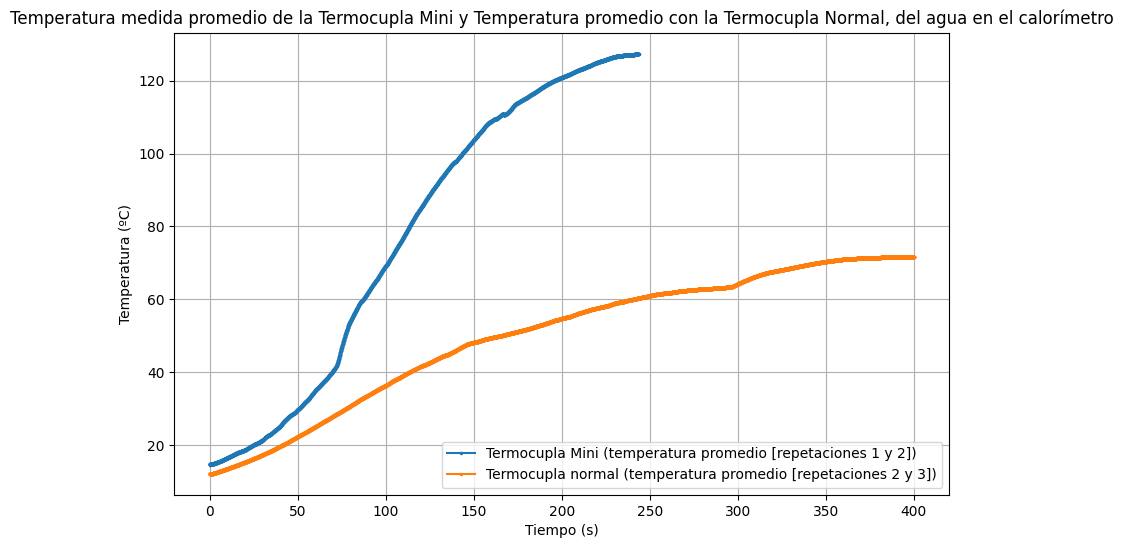

In [74]:
# Combinación de datos del calorímetro del laboratorio

# Crear una referencia de tiempo común usando la intersección de los rangos de tiempo de cada DataFrame
tiempo_comun_a = pd.Series(sorted(set(d4['Tiempo']).union(set(d5['Tiempo']))))

tiempo_comun_b = pd.Series(sorted(set(d5_5['Tiempo']).union(set(d6['Tiempo']))))

# Interpolación para alinear los datos
d4_interp = d4.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()
d5_interp = d5.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()

d5_5_interp = d5_5.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()
d6_interp = d6.set_index('Tiempo').reindex(tiempo_comun).interpolate(method='linear').reset_index()

# Crear un DataFrame para las mediciones promedio
df_combinadot_a = pd.DataFrame()
df_combinadot_b = pd.DataFrame()

# Asignar la columna 'Tiempo'
df_combinadot_a['Tiempo'] = tiempo_comun_a
df_combinadot_b['Tiempo'] = tiempo_comun_b

# Calcular el promedio de las columnas de temperatura
df_combinadot_a['Temperatura_1_Promedio'] = (d4_interp['Temperatura_1'] + d5_interp['Temperatura_1']) / 2

df_combinadot_b['Temperatura_4_Promedio'] = (d5_5_interp['Temperatura_4'] + d6_interp['Temperatura_4']) / 2

plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Graficar la temperatura promedio
plt.plot(df_combinadot_a['Tiempo'], df_combinadot_a['Temperatura_1_Promedio'], label='Termocupla Mini (temperatura promedio [repetaciones 1 y 2])', marker='o', linestyle='-', markersize=1.5)

plt.plot(df_combinadot_b['Tiempo'], df_combinadot_b['Temperatura_4_Promedio'], label='Termocupla normal (temperatura promedio [repetaciones 2 y 3])', marker='o', linestyle='-', markersize=1.5)


# Configurar etiquetas y título
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (ºC)')
plt.title('Temperatura medida promedio de la Termocupla Mini y Temperatura promedio con la Termocupla Normal, del agua en el calorímetro')
plt.legend()  # Mostrar leyenda

# Mostrar la gráfica
plt.grid(True)  # Mostrar cuadrícula

print("Diferencias promedios de la temperatura medida del agua en el calorímetro (Termocupla mini y normal):\n")

dif_da_db = round(abs(np.mean([df_combinadot_a['Temperatura_1_Promedio']]) - np.mean([df_combinadot_b['Temperatura_4_Promedio']])),2)
print('· Termocupla mini [temperatura promedio] con Termocupla normal [temperatura promedio]: '+str(dif_da_db)+' ºC \n')

plt.show()


## **Boxplots para graficar la variación de la temperatura promedio medida del agua calentada en el calorímetro por la termocupla normal y la termocupla mini**

Análisis de varianza (ANOVA) de la temperatura medida del hielo (termocupla mini)

Estadístico F: 2911.291734872758
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.



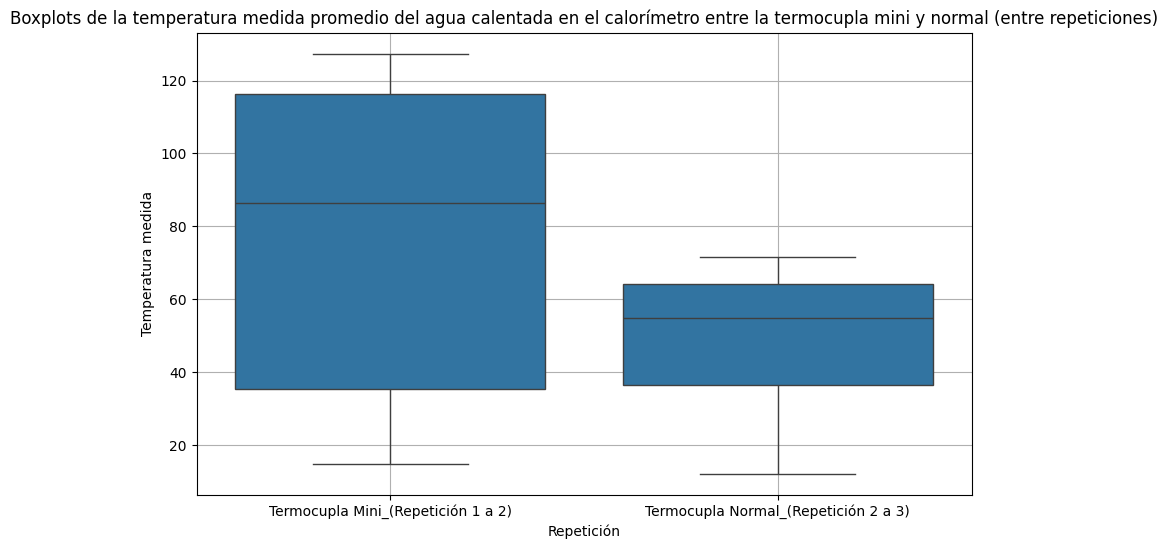

In [75]:

# Para realizar una interpretación estadística no solo a través de diferencias de promedios, se puede aplicar ANOVA.
# Este se debe a que el ANOVA (Análisis de Varianza) es una técnica estadística utilizada para comparar las medias de tres
# o más grupos y determinar si existen diferencias significativas entre ellos.

# Una forma de visualizar también eso junto a la varianza de los datos, es a travésde los boxplots por cómo representan las distribución de los datos
# a través de cuartiles, denotando también la media y denotando los valores que son atípicos.

df = pd.DataFrame({
    'Grupo': ['Termocupla Mini_(Repetición 1 a 2)'] * len(df_combinadot_a['Temperatura_1_Promedio']) + ['Termocupla Normal_(Repetición 2 a 3)'] * len(df_combinadot_b['Temperatura_4_Promedio']),
    'Termocuplas': pd.concat([df_combinadot_a['Temperatura_1_Promedio'], df_combinadot_b['Temperatura_4_Promedio']])
})

# Graficar boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Termocuplas', data=df)
plt.title('Boxplots de la temperatura medida promedio del agua calentada en el calorímetro entre la termocupla mini y normal (entre repeticiones)')
plt.xlabel('Repetición')
plt.ylabel('Temperatura medida')
plt.grid(True)

# Aplicar ANOVA
statistic, p_value = f_oneway(df_combinadot_a['Temperatura_1_Promedio'], df_combinadot_b['Temperatura_4_Promedio'])

# Mostrar resultados
print('Análisis de varianza (ANOVA) de la temperatura medida del hielo (termocupla mini)\n')
print(f'Estadístico F: {statistic}')
print(f'Valor p: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print('Hay diferencias significativas entre al menos dos grupos.')
else:
    print('No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.')
print()
plt.show()

## **Diagrama de energía, calor sensible y latente de la temperatura medida del agua calentada en el calorimetro**

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define las masas en kg para cada repetición
masa_rep1 = 113.95 / 1000  # kg
masa_rep2_y_3 = 125.9 / 1000  # kg

# Se define la capacidad calorífica específica (en J/kg°C)
c = 4180  # J/kg°C, capacidad calorífica específica del agua

# Se define el calor latente para fusión (en J/kg)
calor_latente_fusion = 334000  # J/kg (334 J/g)

# Es definido el umbral de fusión y ebullición (en °C)
umbral_fusion = 0
umbral_ebullicion = 100

def calcular_calor_sensible(temperatura, masa, c):
    return masa * c * temperatura

def calcular_calor_latente(temperatura, umbral_fusion, calor_latente, masa):
    # Calor latente se calcula solo cuando la temperatura está en el rango de fusión
    return np.where(temperatura >= umbral_fusion, masa * calor_latente, 0)

def calcular_energia_total(temperatura, masa, c, calor_latente, umbral_fusion):
    calor_sensible = calcular_calor_sensible(temperatura, masa, c)
    calor_latente_total = calcular_calor_latente(temperatura, umbral_fusion, calor_latente, masa)
    return calor_sensible + calor_latente_total

# Para cada serie de datos:
def graficar_energia(datos, col_tiempo, col_temp, nombre, masa):
    tiempo = datos[col_tiempo].values
    temperatura = datos[col_temp].values

    energia_total = calcular_energia_total(temperatura, masa, c, calor_latente_fusion, umbral_fusion)
    calor_sensible = calcular_calor_sensible(temperatura, masa, c)
    calor_latente = calcular_calor_latente(temperatura, umbral_fusion, calor_latente_fusion, masa)

    plt.figure(figsize=(12, 6))

    # Diagrama de energía en función de la temperatura
    plt.subplot(1, 2, 1)
    plt.plot(temperatura, energia_total, label='Energía Total')
    plt.axvline(x=umbral_fusion, color='blue', linestyle='--', label='Fusión (0°C)')
    plt.axvline(x=umbral_ebullicion, color='red', linestyle='--', label='Ebullición (100°C)')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Energía Total (J)')
    plt.title(f'Diagrama de Energía - {nombre}')
    plt.legend()

    # Diagrama de energía en función de la temperatura con calor sensible y latente
    plt.subplot(1, 2, 2)
    plt.plot(temperatura, calor_sensible, label='Calor Sensible', color='blue')
    plt.plot(temperatura, calor_latente, label='Calor Latente', color='red', linestyle='--')
    plt.plot(temperatura, energia_total, label='Energía Total', color='black', linestyle=':')
    plt.axvline(x=umbral_fusion, color='purple', linestyle='--', label='Fusión (0°C)')
    plt.axvline(x=umbral_ebullicion, color='green', linestyle='--', label='Ebullición (100°C)')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Energía (J)')
    plt.title(f'Calor Sensible y Latente - {nombre}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Graficar para cada serie de datos con las masas correspondientes

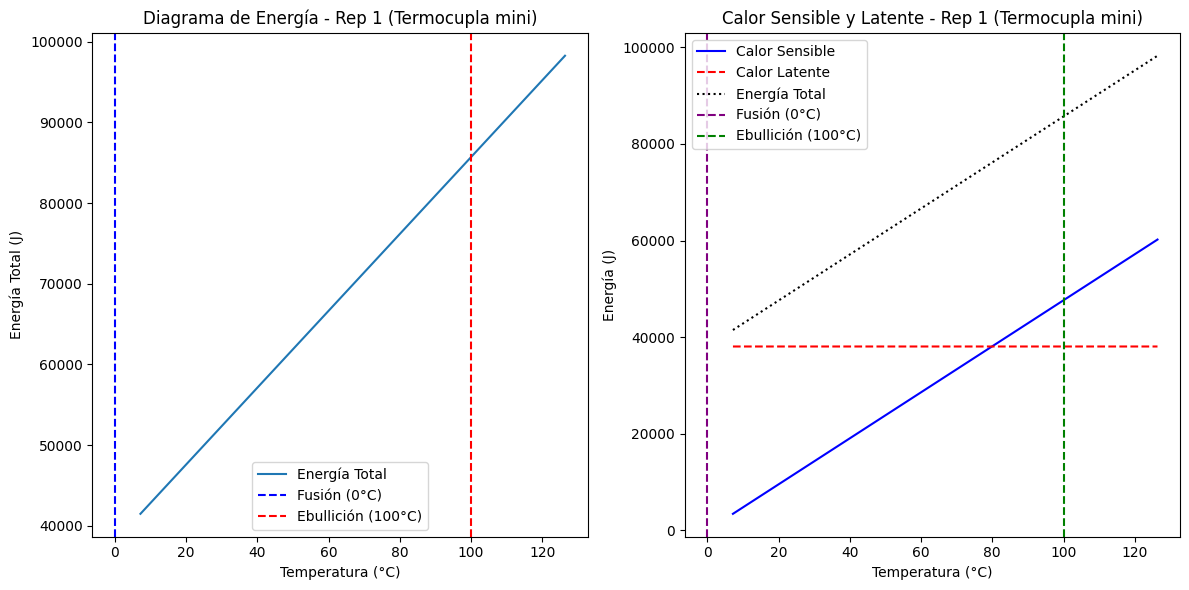

In [77]:
graficar_energia(d4, 'Tiempo', 'Temperatura_1', 'Rep 1 (Termocupla mini)', masa_rep1)

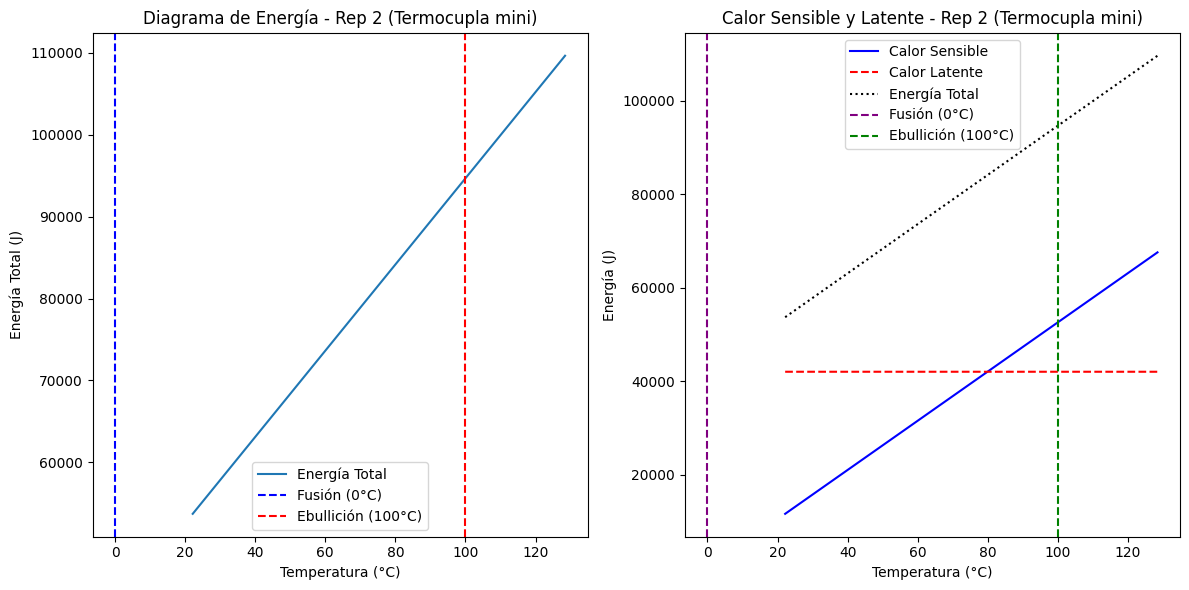

In [78]:
graficar_energia(d5, 'Tiempo', 'Temperatura_1', 'Rep 2 (Termocupla mini)', masa_rep2_y_3)

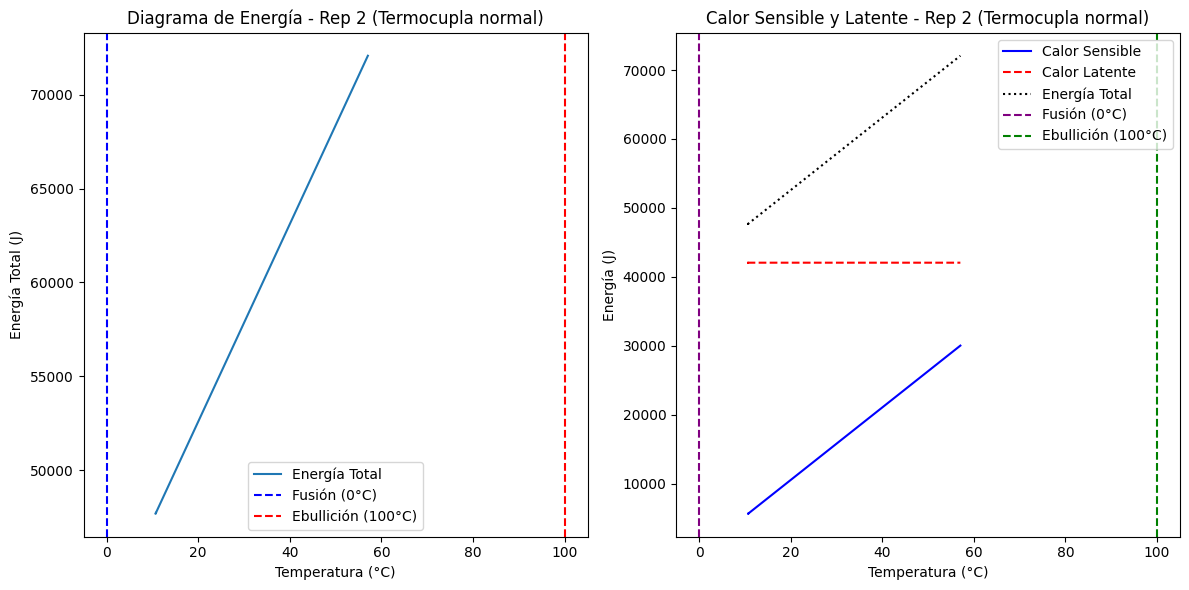

In [79]:
graficar_energia(d5_5, 'Tiempo', 'Temperatura_4', 'Rep 2 (Termocupla normal)', masa_rep2_y_3)

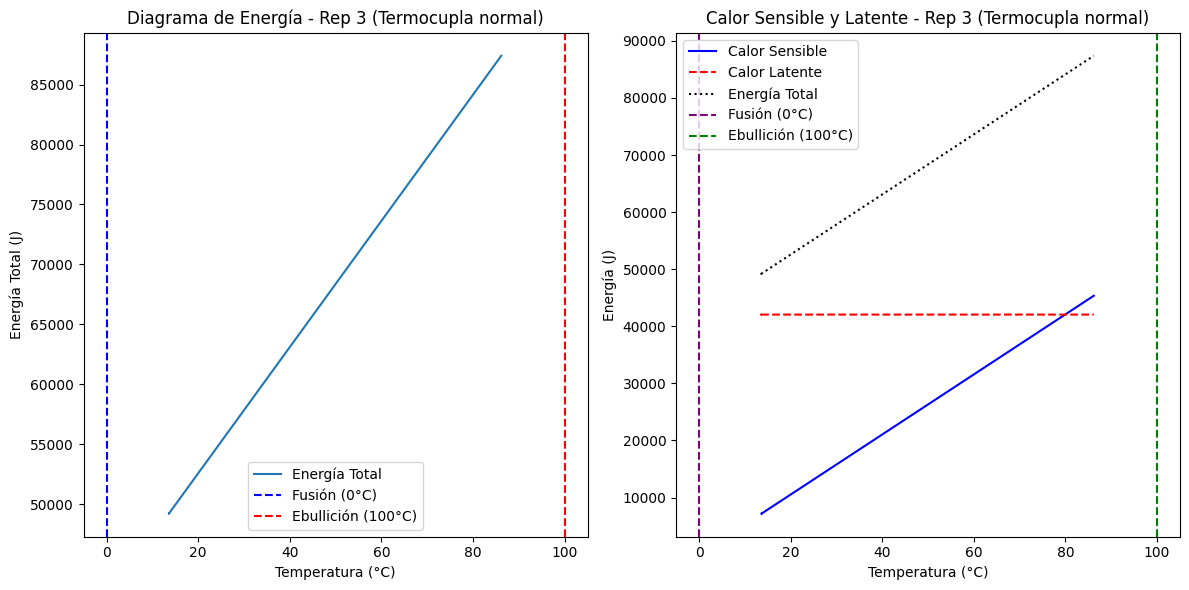

In [80]:
graficar_energia(d6, 'Tiempo', 'Temperatura_4', 'Rep 3 (Termocupla normal)', masa_rep2_y_3)